This notebook preprocess ensemble GEFS according to input used in Price and Rasp (2022)

Input data is 5 ensemble apcp, 5 ensemble pwat, cape, cin, and t2m

In [37]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import cartopy.crs as ccrs  # for plotting map
import cartopy
import matplotlib as mpl

from functions import *

In [38]:
PATH = 'C:\\Users\\bobby\\Desktop\\.vscode\\1 UROP Research\\UROP v2\\raw_preprocessing\\GEFS\\'

# ensemble variables 
apcp_p01 = xr.open_dataset(PATH+'GEFSv12-Reforecast_apcp_p01.nc')
apcp_p02 = xr.open_dataset(PATH+'GEFSv12-Reforecast_apcp_p02.nc')
apcp_p03 = xr.open_dataset(PATH+'GEFSv12-Reforecast_apcp_p03.nc')
apcp_p04 = xr.open_dataset(PATH+'GEFSv12-Reforecast_apcp_p04.nc')
apcp_c00 = xr.open_dataset(PATH+'GEFSv12-Reforecast_apcp_c00.nc')

pwat_p01 = xr.open_dataset(PATH+'GEFSv12-Reforecast_pwat_p01.nc')
pwat_p02 = xr.open_dataset(PATH+'GEFSv12-Reforecast_pwat_p02.nc')
pwat_p03 = xr.open_dataset(PATH+'GEFSv12-Reforecast_pwat_p03.nc')
pwat_p04 = xr.open_dataset(PATH+'GEFSv12-Reforecast_pwat_p04.nc')
pwat_c00 = xr.open_dataset(PATH+'GEFSv12-Reforecast_pwat_c00.nc')

# single variables
cape_c00 = xr.open_dataset(PATH+'GEFSv12-Reforecast_cape_c00.nc')
t2m_c00 = xr.open_dataset(PATH+'GEFSv12-Reforecast_tmp2m_c00.nc')
cin_c00 = xr.open_dataset(PATH+'GEFSv12-Reforecast_cin_c00.nc') # have duplicates

In [3]:
# print(len(set(cin_c00.time.values)))
# print(len(cin_c00.time.values))
# print(len(set(pwat_p01.time.values)))
# print(len(pwat_p01.time.values))

# have duplicated dates in pwat_p01, p02, p03, p04
# print(len(set(pwat_p01.time.values)))
# print(len(pwat_p01.time.values))

# to find the indices of duplicated value
# pwat_duplicates = list(pwat_p01.get_index("time").duplicated())
# indices = [i for i, x in enumerate(pwat_duplicates) if x == True]
# indices

# check if duplicates are due to error in date naming
# pwat_p01.isel(time=6200).pwat.values
# pwat_p01.isel(time=9116).pwat.values
# the duplicates are exactly the same, so it is not a date naming error

In [39]:
pwat_p01 = pwat_p01.sel(time=~pwat_p01.get_index("time").duplicated())
pwat_p02 = pwat_p02.sel(time=~pwat_p02.get_index("time").duplicated())
pwat_p03 = pwat_p03.sel(time=~pwat_p03.get_index("time").duplicated())
pwat_p04 = pwat_p04.sel(time=~pwat_p04.get_index("time").duplicated())

cin_c00 = cin_c00.sel(time=~cin_c00.get_index("time").duplicated())

apcp_train_p01, apcp_val_p01, apcp_test_p01 = trainvaltest(apcp_p01)
apcp_train_p02, apcp_val_p02, apcp_test_p02 = trainvaltest(apcp_p02)
apcp_train_p03, apcp_val_p03, apcp_test_p03 = trainvaltest(apcp_p03)
apcp_train_p04, apcp_val_p04, apcp_test_p04 = trainvaltest(apcp_p04)
apcp_train_c00, apcp_val_c00, apcp_test_c00 = trainvaltest(apcp_c00)

pwat_train_p01, pwat_val_p01, pwat_test_p01 = trainvaltest(pwat_p01)
pwat_train_p02, pwat_val_p02, pwat_test_p02 = trainvaltest(pwat_p02)
pwat_train_p03, pwat_val_p03, pwat_test_p03 = trainvaltest(pwat_p03)
pwat_train_p04, pwat_val_p04, pwat_test_p04 = trainvaltest(pwat_p04)
pwat_train_c00, pwat_val_c00, pwat_test_c00 = trainvaltest(pwat_c00)

cape_train_c00, cape_val_c00, cape_test_c00 = trainvaltest(cape_c00)
t2m_train_c00, t2m_val_c00, t2m_test_c00 = trainvaltest(t2m_c00)
cin_train_c00, cin_val_c00, cin_test_c00 = trainvaltest(cin_c00)

In [5]:
# import scipy as sp
# # a=cape_train_c00.cape.values
# # a = pwat_train_c00.pwat.values

# a=t2m_train_c00.t2m.values

# p=sp.stats.mstats.normaltest(a, axis=0).pvalue
# if p.all()<0.01:
#    print ('distribution is not normal')
# p=sp.stats.mstats.normaltest(np.log(a), axis=0).pvalue
# if p.all()<0.01:
#    print ('distribution is not log-normal')

In [6]:
# ALL MISSING DATES LIE IN TRAINING DATASET

# print(timecheck(apcp_train_p01, apcp_val_p01, apcp_test_p01))
# print(timecheck(apcp_train_p02, apcp_val_p02, apcp_test_p02))
# print(timecheck(apcp_train_p03, apcp_val_p03, apcp_test_p03))
# print(timecheck(apcp_train_p04, apcp_val_p04, apcp_test_p04))
# print(timecheck(apcp_train_c00, apcp_val_c00, apcp_test_c00))

# print(timecheck(pwat_train_p01, pwat_val_p01, pwat_test_p01))
# print(timecheck(pwat_train_p02, pwat_val_p02, pwat_test_p02))
# print(timecheck(pwat_train_p03, pwat_val_p03, pwat_test_p03))
# print(timecheck(pwat_train_p04, pwat_val_p04, pwat_test_p04))
# print(timecheck(pwat_train_c00, pwat_val_c00, pwat_test_c00))

# print(timecheck(cape_train_c00, cape_val_c00, cape_test_c00))
# print(timecheck(t2m_train_c00, t2m_val_c00, t2m_test_c00))
# print(timecheck(cin_train_c00, cin_val_c00, cin_test_c00))

In [40]:
apcp_train_p01 = resampling(apcp_train_p01, 'apcp')
apcp_train_p02 = resampling(apcp_train_p02, 'apcp')
apcp_train_p03 = resampling(apcp_train_p03, 'apcp')
apcp_train_p04 = resampling(apcp_train_p04, 'apcp')
apcp_train_c00 = resampling(apcp_train_c00, 'apcp')

pwat_train_p01 = resampling(pwat_train_p01, 'pwat')
pwat_train_p02 = resampling(pwat_train_p02, 'pwat')
pwat_train_p03 = resampling(pwat_train_p03, 'pwat')
pwat_train_p04 = resampling(pwat_train_p04, 'pwat')
pwat_train_c00 = resampling(pwat_train_c00, 'pwat')

cape_train_c00 = resampling(cape_train_c00, 'cape')
t2m_train_c00 = resampling(t2m_train_c00, 't2m')
cin_train_c00 = resampling(cin_train_c00, 'cin') 
# an area with a high convection inhibition number (CIN)
# is considered stable and has very little likelihood of developing a thunderstorm

transforming train, val and test datasets

In [35]:
# scaler_train_apcp, apcp_train_c00 = transform_train(apcp_train_c00, 'apcp')

scaler_train_cin_c00, cin_train_c00 = transform_train(cin_train_c00, 'cin')

In [36]:
cin_train_c00

<xarray.Dataset>
Dimensions:    (time: 20457, latitude: 16, longitude: 19)
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01T06:00:00 ... 2014-01-01T06:00:00
  * latitude   (latitude) float64 3.5 3.25 3.0 2.75 2.5 ... 0.5 0.25 0.0 -0.25
  * longitude  (longitude) float64 101.5 101.8 102.0 102.2 ... 105.5 105.8 106.0
Data variables:
    cin        (time, latitude, longitude) float32 0.9994 0.9994 ... 0.9994

(array([3.00000e+00, 9.00000e+00, 2.90000e+01, 4.00000e+01, 1.01000e+02,
        1.24000e+02, 2.18000e+02, 1.37000e+03, 3.50980e+04, 6.18072e+06]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

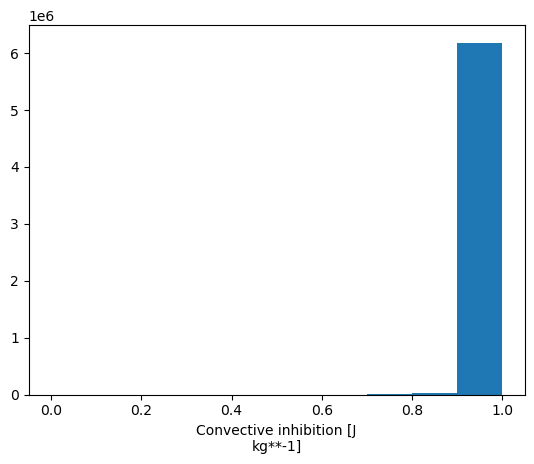

In [29]:
cin_train_c00.cin.plot()

converting to .npy files

In [ ]:
apcp_train_p01 = apcp_train_p01.tp.values
apcp_train_p02 = apcp_train_p02.tp.values
# apcp_train_p03 = apcp_train_p03.tp.values
# apcp_train_p04 = apcp_train_p04.tp.values
# apcp_train_c00 = apcp_train_c00.tp.values

# pwat_train_p01 = pwat_train_p01.pwat.values
# pwat_train_p02 = pwat_train_p02.pwat.values
# pwat_train_p03 = pwat_train_p03.pwat.values
# pwat_train_p04 = pwat_train_p04.pwat.values
# pwat_train_c00 = pwat_train_c00.pwat.values

# cape_train_c00 = cape_train_c00.cape.values
# t2m_train_c00 = t2m_train_c00.t2m.values
# cin_train_c00 = cin_train_c00.cin.values

AttributeError: 'numpy.ndarray' object has no attribute 'tp'

combining variables into 1 4D array

In [ ]:
ensemble_input = [apcp_train_p01, apcp_train_p02, apcp_train_p03, apcp_train_p04, apcp_train_c00,
                  pwat_train_p01, pwat_train_p02, pwat_train_p03, pwat_train_p04, pwat_train_c00,
                  cape_train_c00, t2m_train_c00]
                  
y = np.stack((ensemble_input), axis = -1) # stacking 13 variables into 1 single 4D array

TypeError: cannot directly convert an xarray.Dataset into a numpy array. Instead, create an xarray.DataArray first, either with indexing on the Dataset or by invoking the `to_array()` method.

In [ ]:
y.shape

(20457, 16, 19, 2)

In [ ]:
# print(not ds_reforecast_apcp.tp.isnull().any()) # True if contains all numeric values